solving poisson equation in 2D

F_xx + F_yy = - G(x,y)

Geometry of the system: field vanishes at boundary, which is a rectangle.

In [1]:
import numpy as np
print('Numpy version is', np.version.version)
import matplotlib.pyplot as plt

Numpy version is 1.14.2


Setup coordinate grid

In [2]:
x_steps = 100
x_upper = 5
dx = x_upper/x_steps
x_vals = np.linspace(0,x_upper,x_steps)

y_steps = 100
y_upper = 5
dy = y_upper/y_steps
y_vals = np.linspace(0,y_upper,y_steps)

grid = np.meshgrid(x_vals,y_vals)

n_x = x_steps - 1
n_y = y_steps - 1

A_small and I_small are the basic blocks of the main finite difference (block) matrix (A): The final finite difference equation will be A F = G where F and G are 1-D arrays created by flattening F and G evaluated on the spatial grid.

In [3]:
A_small = (2*np.identity(n_x) -  np.array([[1 if abs(i-j) == 1 else 0 for i in np.arange(1, n_x+1)] for j in np.arange(1, n_x+1)]))/dx**2

I_small = np.identity(n_x)/dy**2

In [4]:
A_block_off_diag = -np.array(np.bmat([[I_small.tolist()
                               if abs(i-j) == 1
                               else np.zeros([n_x,n_x]).tolist()
                               for i in np.arange(1, n_y+1)]
                              for j in np.arange(1, n_y+1)]))

In [5]:
A_block_diag = np.array(np.bmat([[(A_small + 2*I_small).tolist()
                               if i==j
                               else np.zeros([n_x,n_x]).tolist()
                               for i in np.arange(1, n_y+1)]
                              for j in np.arange(1, n_y+1)]))

In [6]:
A = A_block_off_diag + A_block_diag

print("dim(A) =", A.shape) #check shape, should be square matrix of dimension n_x*n_y
print('n_x*n_y =', n_x*n_y)

dim(A) = (9801, 9801)
n_x*n_y = 9801


Create array for the source function G(x,y).

This is a flattened array that orders the array by increasing x for each y, and increasing y.

In [7]:
def g_array(G):                 # provide G as a function of x and y
    return np.array([[G(i,j) for i in x_vals[1:]] for j in y_vals[1:]]).flatten()

In [8]:
# invert A

A_inv = np.linalg.inv(A)

With A inverted, the final solution is given by A_inv*F.

F still needs to be evaluated and flattened.

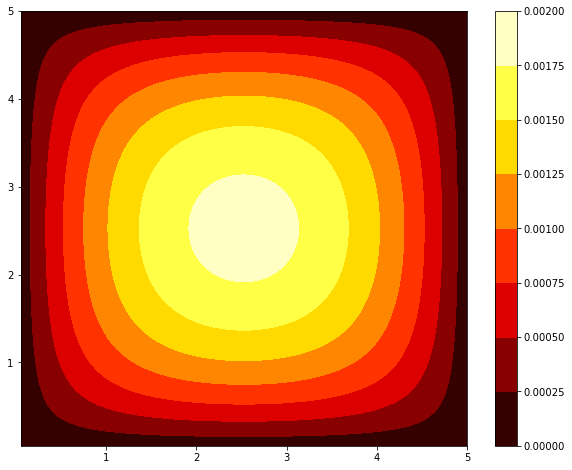

In [9]:
F = np.dot(A_inv, g_array(lambda x,y: .001)).reshape(n_x,n_y)            # no source (= very weak source)

fig = plt.figure(figsize=(10,8))
F_contourplot = plt.contourf(x_vals[1:],y_vals[1:],F,cmap = 'hot')
fig.colorbar(F_contourplot)
plt.show()

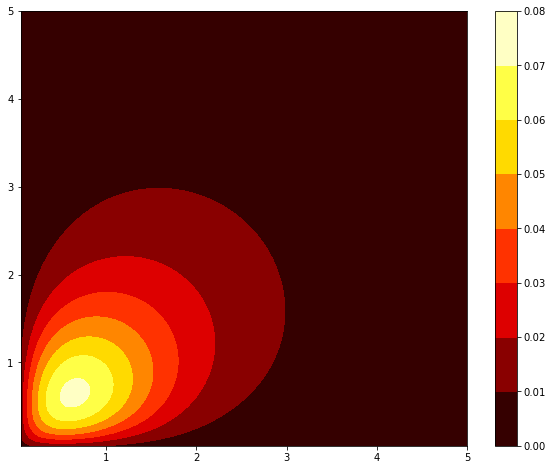

In [10]:
F = np.dot(A_inv, g_array(lambda x,y: np.exp(-x**2 - y**2))).reshape(n_x,n_y)            # gaussian source at origin

fig = plt.figure(figsize=(10,8))
F_contourplot = plt.contourf(x_vals[1:],y_vals[1:],F,cmap = 'hot')
fig.colorbar(F_contourplot)
plt.show()

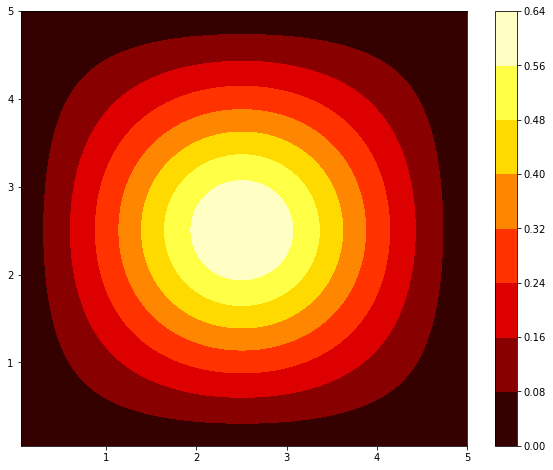

In [11]:
F = np.dot(A_inv,
           g_array(lambda x,y: np.exp(-(x-x_upper/2)**2 - (y-y_upper/2)**2))).reshape(n_x,n_y)     # gaussian source at center

fig = plt.figure(figsize=(10,8))
F_contourplot = plt.contourf(x_vals[1:],y_vals[1:],F,cmap = 'hot')
fig.colorbar(F_contourplot)
plt.show()

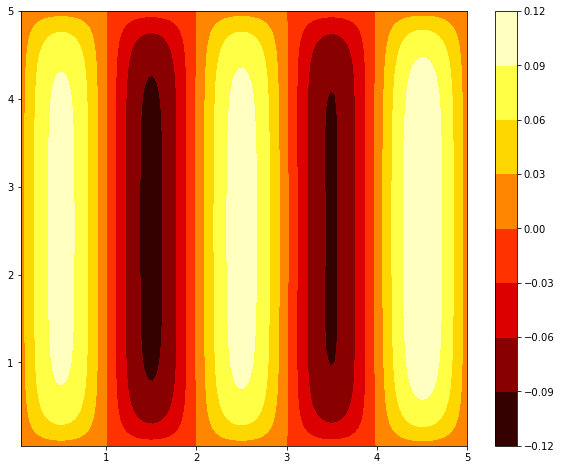

In [12]:
F = np.dot(A_inv, g_array(lambda x,y: np.sin(np.pi*x))).reshape(n_x,n_y)            # assume sine source in x-direction, with period = 2

fig = plt.figure(figsize=(10,8))
F_contourplot = plt.contourf(x_vals[1:],y_vals[1:],F,cmap = 'hot')
fig.colorbar(F_contourplot)
plt.show()